# Social Media Sentiment Analysis Using Twitter Dataset


# Introduction

 Social media sentiment analysis is the process of using natural language processing and machine learning techniques to identify, extract, and quantify the emotional tone and sentiment expressed in social media data. In recent years, social media platforms such as Twitter have become an important source of data for sentiment analysis. With over 300 million active users, Twitter is a valuable source of real-time information on a wide range of topics, including news events, political developments, and brand sentiment.

Twitter sentiment analysis involves analyzing large volumes of Twitter data to identify the sentiment expressed in each tweet, whether it is positive, negative, or neutral. This can be achieved by applying various natural language processing techniques, including sentiment analysis algorithms, machine learning classifiers, and text mining techniques.

The Twitter dataset used for sentiment analysis typically includes a collection of tweets related to a specific topic or event. These tweets can be collected using various methods, including web scraping and Twitter's API. Once the dataset has been collected, it can be pre-processed to remove noise and irrelevant data, such as retweets, links, and hashtags.

After pre-processing, the dataset can be analyzed using various techniques to identify sentiment patterns and trends. These techniques may include text classification algorithms, sentiment lexicons, and machine learning models. The output of the analysis may include metrics such as the overall sentiment score, the most frequently used words and phrases, and the sentiment trends over time.

Social media sentiment analysis has many applications, including brand management, marketing research, political analysis, and customer service. By analyzing social media data, businesses and organizations can gain valuable insights into customer opinions and preferences, and make data-driven decisions to improve their products and services.

# Abstract

Social media sentiment analysis is a technique used to identify the emotions and opinions expressed in online content. With the increasing use of social media, sentiment analysis has become an essential tool for businesses, organizations, and governments to understand the public's opinions and attitudes. In this project, we will focus on sentiment analysis using Twitter data.

The dataset used in this project is a collection of tweets obtained from Twitter's API. The dataset contains tweets on various topics, including politics, sports, entertainment, and technology. The first step in the analysis is data cleaning, where we remove irrelevant information such as links, hashtags, and mentions.

We then use Natural Language Processing (NLP) techniques to perform sentiment analysis on the tweets. We use the Vader sentiment analysis tool to determine the positive, negative, or neutral sentiment of each tweet. We also perform topic modeling to identify the topics that are most prevalent in the tweets.

The results of the analysis are visualized using various graphs and charts, including word clouds, bar charts, and scatter plots. These visualizations help to understand the overall sentiment and topics of discussion on Twitter. The analysis can be used to identify the public's opinion on a particular topic or brand and can be helpful in making informed decisions.

In conclusion, this project demonstrates the use of sentiment analysis on Twitter data to understand the public's opinions and attitudes. The results of this analysis can be beneficial for businesses, organizations, and governments to make informed decisions based on the sentiment of the public.






# Problem Definition

Given tweets about six US airlines, the task is to predict whether a tweet contains positive, negative, or neutral sentiment about the airline. This is a typical supervised learning task where given a text string, we have to categorize the text string into predefined categories.

# Solution

To solve this problem, we will follow the typical machine learning pipeline. We will first import the required libraries and the dataset. We will then do exploratory data analysis to see if we can find any trends in the dataset. Next, we will perform text preprocessing to convert textual data to numeric data that can be used by a machine learning algorithm. Finally, we will use machine learning algorithms to train and test our sentiment analysis models.

# Importing the Required Libraries

The first step as always is to import the required libraries:

In [2]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
airline_tweets = pd.read_csv("Tweets.csv")

In [4]:
airline_tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
airline_tweets.shape

(14640, 15)

In [6]:
airline_tweets.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# Data Analysis

Let's explore the dataset a bit to see if we can find any trends. 

In [7]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 6
plot_size[1] = 5
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


<AxesSubplot:ylabel='airline'>

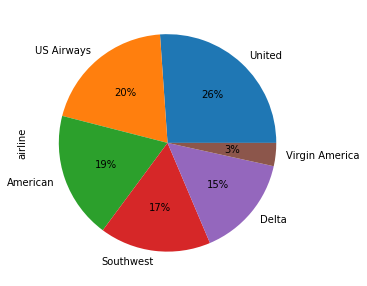

In [8]:
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

In the output, you can see the percentage of public tweets for each airline. United Airline has the highest number of tweets i.e. 26%, followed by US Airways (20%).



Let's now see the distribution of sentiments across all the tweets. 

<AxesSubplot:ylabel='airline_sentiment'>

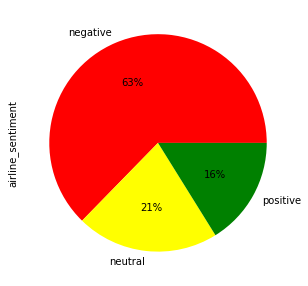

In [9]:
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

From the output, you can see that the majority of the tweets are negative (63%), followed by neutral tweets (21%), and then the positive tweets (16%).

Next, let's see the distribution of sentiment for each individual airline,

<AxesSubplot:xlabel='airline'>

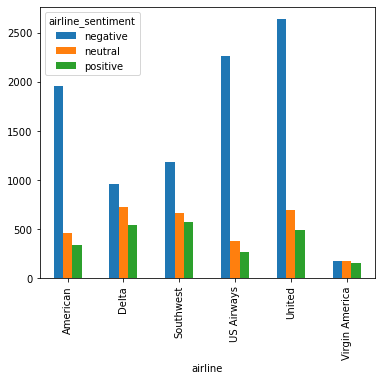

In [10]:
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

It is evident from the output that for almost all the airlines, the majority of the tweets are negative, followed by neutral and positive tweets. Virgin America is probably the only airline where the ratio of the three sentiments is somewhat similar.

let's use the Seaborn library to view the average confidence level for the tweets belonging to three sentiment categories. 

<AxesSubplot:xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

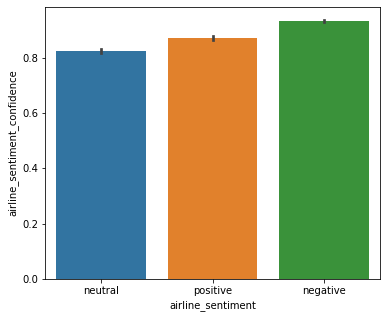

In [11]:
import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

From the output, you can see that the confidence level for negative tweets is higher compared to positive and neutral tweets.

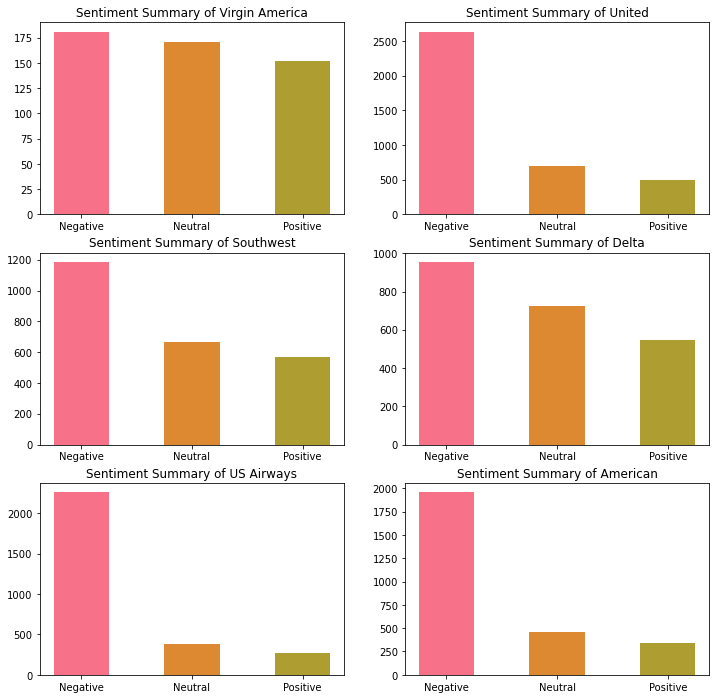

In [12]:
def plot_sub_sentiment(Airline):
    pdf = airline_tweets[airline_tweets['airline']==Airline]
    count = pdf['airline_sentiment'].value_counts()
    Index = [1,2,3]
    color=sns.color_palette("husl", 10)
    plt.bar(Index,count,width=0.5,color=color)
    plt.xticks(Index,['Negative','Neutral','Positive'])
    plt.title('Sentiment Summary of' + " " + Airline)

airline_name = airline_tweets['airline'].unique()
plt.figure(1,figsize=(12,12))
for i in range(6):
    plt.subplot(3,2,i+1)
    plot_sub_sentiment(airline_name[i])

In [13]:
#counting the total number of negative reasons
airline_tweets.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

Text(0, 0.5, 'No. of Tweets')

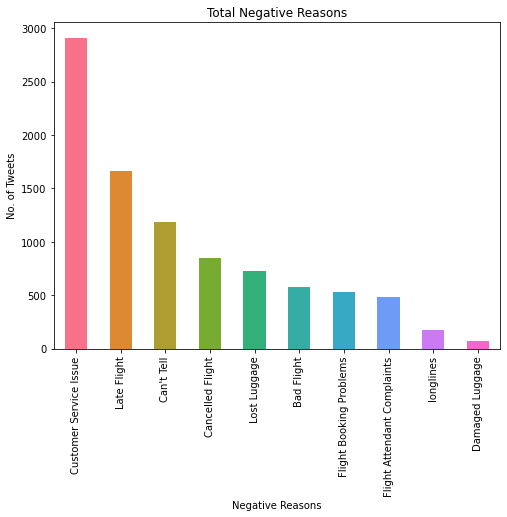

In [14]:
#Plotting all the negative reasons 
color=sns.color_palette("husl", 10)
pd.Series(airline_tweets["negativereason"]).value_counts().plot(kind = "bar",
                        color=color,figsize=(8,6),title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

# Word Cloud for the negative Tweets

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
airline_tweets=airline_tweets [airline_tweets ['airline_sentiment']=='negative']
words = ' '.join(airline_tweets ['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

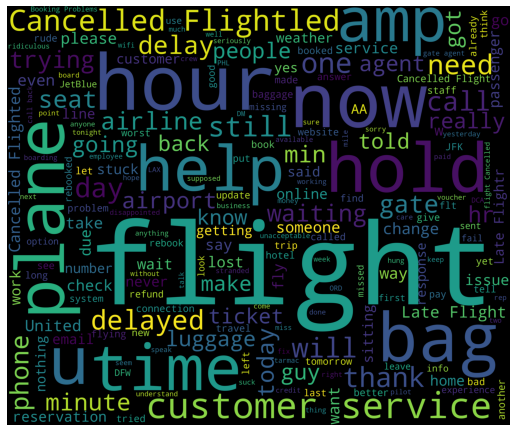

In [19]:
plt.figure(1,figsize=(9, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

####  We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.

# Wordcloud for positive reasons

The code for getting positive sentiments is completely same with the one for negative sentiments. Just replace negative with positive in the first line. Easy, right!

In [20]:
airline_tweets=airline_tweets [airline_tweets ['airline_sentiment']=='positive']
words = ' '.join(airline_tweets ['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

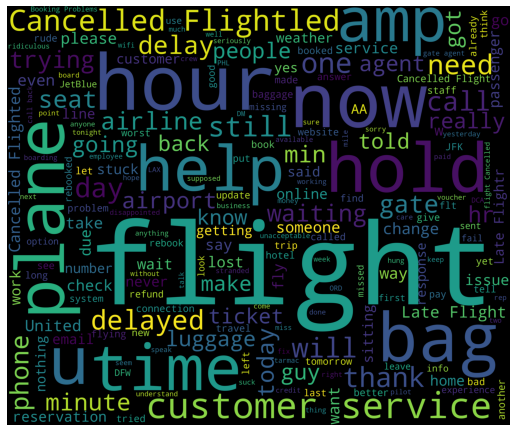

In [21]:
plt.figure(1,figsize=(9, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [22]:
# Calculate highest frequency words in positive tweets
def freq(str): 
  
    # break the string into list of words  
    str = str.split()          
    str2 = [] 
  
    # loop till string values present in list str 
    for i in str:              
  
        # checking for the duplicacy 
        if i not in str2: 
  
            # insert value in str2 
            str2.append(i)  
              
    for i in range(0, len(str2)): 
        if(str.count(str2[i])>50): 
            print('Frequency of', str2[i], 'is :', str.count(str2[i]))
        
print(freq(cleaned_word))

None


In [23]:
air_senti=pd.crosstab(airline_tweets.airline, airline_tweets.airline_sentiment)
air_senti

airline_sentiment
airline


In [24]:
percent=air_senti.apply(lambda a: a / a.sum() * 100, axis=1)
percent

airline_sentiment
airline


**American,US Airways , United have more negative tweets**

In [ ]:
airline_tweets['tweet_created'] = pd.to_datetime(airline_tweets['tweet_created'])
airline_tweets["date_created"] = airline_tweets["tweet_created"].dt.date

In [ ]:
airline_tweets["date_created"]

In [ ]:
df = airline_tweets.groupby(['date_created','airline'])
df = df.airline_sentiment.value_counts()
df.unstack()

Enough of the exploratory data analysis, our next step is to perform some preprocessing on the data and then convert the numeric data into text data as shown below.

# Data Cleaning

Tweets contain many slang words and punctuation marks. We need to clean our tweets before they can be used for training the machine learning model. However, before cleaning the tweets, let's divide our dataset into feature and label sets.

Our feature set will consist of tweets only. If we look at our dataset, the 11th column contains the tweet text. Note that the index of the column will be 10 since pandas columns follow zero-based indexing scheme where the first column is called 0th column. Our label set will consist of the sentiment of the tweet that we have to predict. The sentiment of the tweet is in the second column (index 1). To create a feature and a label set, we can use the iloc method off the pandas data frame.

In [ ]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [ ]:
features

In [ ]:
labels

Once we divide the data into features and training set, we can preprocess data in order to clean it. To do so, we will use regular expressions. 

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [ ]:
processed_features

# Representing Text in Numeric Form

To make statistical algorithms work with text, we first have to convert text to numbers. To do so, three main approaches exist i.e. Bag of Words, TF-IDF and Word2Vec. 

# TF-IDF

In the bag of words approach, each word has the same weight. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [ ]:
processed_features

In the code above, we define that the max_features should be 2500, which means that it only uses the 2500 most frequently occurring words to create a bag of words feature vector. Words that occur less frequently are not very useful for classification.

Similarly, max_df specifies that only use those words that occur in a maximum of 80% of the documents. Words that occur in all documents are too common and are not very useful for classification. Similarly, min-df is set to 7 which shows that include words that occur in at least 7 documents.

# Dividing Data into Training and Test Sets

n the previous section, we converted the data into the numeric form. As the last step before we train our algorithms, we need to divide our data into training and testing sets. The training set will be used to train the algorithm while the test set will be used to evaluate the performance of the machine learning model.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

# Training the Model

Once data is split into training and test set, machine learning algorithms can be used to learn from the training data. 
The sklearn.ensemble module contains the RandomForestClassifier class that can be used to train the machine learning model using the random forest algorithm. To do so, we need to call the fit method on the RandomForestClassifier class and pass it our training features and labels, as parameters.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

# Making Predictions and Evaluating the Model

The last step is to make predictions on the model. To do so, we need to call the predict method on the object of the RandomForestClassifier class that we used for training.

In [ ]:
predictions = text_classifier.predict(X_test)

To evaluate the performance of the machine learning models, we can use classification metrics such as a confusion metrix, F1 measure, accuracy, etc.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

# KNN ALGO

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
text_classifier2 = KNeighborsClassifier(n_neighbors = 5)#no of neighbors is hpyer parameter
text_classifier2.fit(X_train, y_train)

In [ ]:
predictions2 = text_classifier2.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions2))
print(classification_report(y_test,predictions2))
print(accuracy_score(y_test, predictions2))

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
predictions3 = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions3))
print(classification_report(y_test,predictions3))
print(accuracy_score(y_test, predictions3))

# Decision Tree Algorithim

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier(criterion="gini")
#here we are facing the problem of overfitting
#train the model
model3.fit(X_train, y_train)

In [ ]:
predictions4 = model3.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions4))
print(classification_report(y_test,predictions4))
print(accuracy_score(y_test, predictions4))

**Please upvote me if you found valuable**